In [2]:
# PyPSA Parser EDA - Exploring PyPSA-USA NetCDF Files
# This notebook explores the structure and contents of PyPSA-USA NetCDF files

import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("PyPSA Parser EDA - Exploring PyPSA-USA NetCDF Files")
print("=" * 60)


PyPSA Parser EDA - Exploring PyPSA-USA NetCDF Files


In [6]:
# 1. Find and Load PyPSA-USA NetCDF Files
# ==========================================

# Define the path to your PyPSA-USA installation
PYPSA_USA_PATH = Path("../../pypsa-usa/workflow")

# Look for NetCDF files in the results directory
def find_netcdf_files(base_path):
    """Find all NetCDF files in the PyPSA-USA results directory."""
    netcdf_files = []
    
    if base_path.exists():
        # Look in results/Default/*/networks directory
        results_path = base_path / "results" / "Default"
        if results_path.exists():
            for networks_dir in results_path.glob("*/networks"):
                for nc_file in networks_dir.glob("*.nc"):
                    netcdf_files.append(nc_file)
    
    return netcdf_files

# Find available NetCDF files
netcdf_files = find_netcdf_files(PYPSA_USA_PATH)

print(f"Found {len(netcdf_files)} NetCDF files:")
print("-" * 40)

for i, file_path in enumerate(netcdf_files):
    print(f"{i+1:2d}. {file_path.relative_to(PYPSA_USA_PATH)}")

if not netcdf_files:
    print("No NetCDF files found. You may need to run PyPSA-USA first.")
    print("Expected location: pypsa-usa/workflow/results/Default/*/networks/*.nc")
else:
    # Select the first file for analysis (you can change this)
    selected_file = netcdf_files[0]
    print(f"\nSelected file for analysis: {selected_file.name}")
    print(f"Full path: {selected_file}")


Found 1 NetCDF files:
----------------------------------------
 1. results/Default/texas/networks/elec_s10_c8_ec_lv1.0_REM-3h_E.nc

Selected file for analysis: elec_s10_c8_ec_lv1.0_REM-3h_E.nc
Full path: ../../pypsa-usa/workflow/results/Default/texas/networks/elec_s10_c8_ec_lv1.0_REM-3h_E.nc


In [7]:
# 2. Load and Explore Network Structure
# =====================================

if netcdf_files:
    # Load the PyPSA network
    print("Loading PyPSA network...")
    n = pypsa.Network(str(selected_file))
    
    print(f"\nNetwork loaded successfully!")
    print(f"Network name: {n.name}")
    print(f"Snapshots: {len(n.snapshots)}")
    print(f"Investment periods: {n.investment_periods}")
    
    # Basic network info
    print(f"\nNetwork Summary:")
    print(f"- Buses: {len(n.buses)}")
    print(f"- Generators: {len(n.generators)}")
    print(f"- Lines: {len(n.lines)}")
    print(f"- Storage Units: {len(n.storage_units)}")
    print(f"- Loads: {len(n.loads)}")
    print(f"- Links: {len(n.links)}")
    print(f"- Transformers: {len(n.transformers)}")
    
    # Check if network has been solved
    if hasattr(n, 'objective') and n.objective is not None:
        print(f"\nNetwork has been solved!")
        print(f"Objective value: {n.objective:.2e}")
    else:
        print(f"\nNetwork appears to be unsolved (no objective value)")
        
else:
    print("No NetCDF files available for analysis.")


Loading PyPSA network...


INFO:pypsa.io:Imported network elec_s10_c8_ec_lv1.0_REM-3h_E.nc has buses, carriers, generators, global_constraints, links, loads, storage_units



Network loaded successfully!
Network name: 
Snapshots: 2920
Investment periods: Index([2030], dtype='int64', name='name')

Network Summary:
- Buses: 8
- Generators: 98
- Lines: 0
- Storage Units: 24
- Loads: 8
- Links: 22
- Transformers: 0

Network has been solved!
Objective value: 3.31e+09


In [18]:
n.generators.tail()

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,ramp_limit_up,ramp_limit_down,efficiency,marginal_cost,capital_cost,...,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
p62 nuclear_2030,nuclear,p62,0.0,0.0,True,0.325,0.325,0.325,11.369043,453809.25084,...,False,0.0,0.0,0.0,0,0,1,0,1.0,1.0
p63 nuclear_2030,nuclear,p63,0.0,0.0,True,0.325,0.325,0.325,11.368005,453809.25084,...,False,0.0,0.0,0.0,0,0,1,0,1.0,1.0
p64 nuclear_2030,nuclear,p64,0.0,0.0,True,0.325,0.325,0.325,11.369977,453809.25084,...,False,0.0,0.0,0.0,0,0,1,0,1.0,1.0
p65 nuclear_2030,nuclear,p65,0.0,0.0,True,0.325,0.325,0.325,11.369811,453809.25084,...,False,0.0,0.0,0.0,0,0,1,0,1.0,1.0
p67 nuclear_2030,nuclear,p67,0.0,0.0,True,0.325,0.325,0.325,11.368415,453809.25084,...,False,0.0,0.0,0.0,0,0,1,0,1.0,1.0


In [8]:
# 3. Explore Generators
# =====================

if netcdf_files and len(n.generators) > 0:
    print("Generator Analysis")
    print("=" * 50)
    
    # Basic generator info
    print(f"Total generators: {len(n.generators)}")
    print(f"Generator columns: {list(n.generators.columns)}")
    
    # Carrier (technology) distribution
    carrier_counts = n.generators['carrier'].value_counts()
    print(f"\nGenerator carriers (technologies):")
    for carrier, count in carrier_counts.head(10).items():
        print(f"  {carrier}: {count}")
    
    # Capacity analysis
    print(f"\nCapacity statistics (MW):")
    print(f"  Total capacity: {n.generators['p_nom'].sum():.1f} MW")
    print(f"  Average capacity: {n.generators['p_nom'].mean():.1f} MW")
    print(f"  Median capacity: {n.generators['p_nom'].median():.1f} MW")
    print(f"  Max capacity: {n.generators['p_nom'].max():.1f} MW")
    
    # Extendable generators
    extendable_count = n.generators['p_nom_extendable'].sum()
    print(f"\nExtendable generators: {extendable_count} ({extendable_count/len(n.generators)*100:.1f}%)")
    
    # Show sample generators
    print(f"\nSample generators:")
    sample_cols = ['carrier', 'p_nom', 'marginal_cost', 'capital_cost', 'efficiency']
    available_cols = [col for col in sample_cols if col in n.generators.columns]
    print(n.generators[available_cols].head(10).round(3))
    
else:
    print("No generators found in the network.")


Generator Analysis
Total generators: 98
Generator columns: ['carrier', 'bus', 'p_nom_min', 'p_nom', 'p_nom_extendable', 'ramp_limit_up', 'ramp_limit_down', 'efficiency', 'marginal_cost', 'capital_cost', 'build_year', 'lifetime', 'control', 'p_nom_max', 'p_max_pu', 'weight', 'vom_cost', 'fuel_cost', 'heat_rate', 'carrier_base', 'land_region', 'p_nom_opt', 'type', 'p_nom_mod', 'p_min_pu', 'p_set', 'q_set', 'sign', 'marginal_cost_quadratic', 'committable', 'start_up_cost', 'shut_down_cost', 'stand_by_cost', 'min_up_time', 'min_down_time', 'up_time_before', 'down_time_before', 'ramp_limit_start_up', 'ramp_limit_shut_down']

Generator carriers (technologies):
  solar: 16
  onwind: 14
  OCGT: 14
  CCGT: 12
  nuclear: 12
  coal: 8
  CCGT-95CCS: 8
  oil: 6
  hydro: 4
  biomass: 3

Capacity statistics (MW):
  Total capacity: 159976.0 MW
  Average capacity: 1632.4 MW
  Median capacity: 0.0 MW
  Max capacity: 15080.5 MW

Extendable generators: 71 (72.4%)

Sample generators:
                    ca

In [9]:
# 4. Explore Buses
# ================

if netcdf_files and len(n.buses) > 0:
    print("Bus Analysis")
    print("=" * 50)
    
    # Basic bus info
    print(f"Total buses: {len(n.buses)}")
    print(f"Bus columns: {list(n.buses.columns)}")
    
    # Carrier distribution
    if 'carrier' in n.buses.columns:
        carrier_counts = n.buses['carrier'].value_counts()
        print(f"\nBus carriers:")
        for carrier, count in carrier_counts.items():
            print(f"  {carrier}: {count}")
    
    # Voltage analysis
    if 'v_nom' in n.buses.columns:
        print(f"\nVoltage statistics (kV):")
        print(f"  Average voltage: {n.buses['v_nom'].mean():.1f} kV")
        print(f"  Voltage range: {n.buses['v_nom'].min():.1f} - {n.buses['v_nom'].max():.1f} kV")
        
        # Voltage distribution
        voltage_counts = n.buses['v_nom'].value_counts().sort_index()
        print(f"\nVoltage distribution:")
        for voltage, count in voltage_counts.head(10).items():
            print(f"  {voltage:.1f} kV: {count} buses")
    
    # Geographic info (if available)
    geo_cols = ['x', 'y', 'lon', 'lat', 'state', 'country', 'balancing_area']
    available_geo = [col for col in geo_cols if col in n.buses.columns]
    if available_geo:
        print(f"\nGeographic information available: {available_geo}")
        
        if 'state' in n.buses.columns:
            state_counts = n.buses['state'].value_counts()
            print(f"\nTop 10 states by bus count:")
            for state, count in state_counts.head(10).items():
                print(f"  {state}: {count}")
    
    # Show sample buses
    print(f"\nSample buses:")
    sample_cols = ['carrier', 'v_nom', 'x', 'y', 'state']
    available_cols = [col for col in sample_cols if col in n.buses.columns]
    print(n.buses[available_cols].head(10).round(3))
    
else:
    print("No buses found in the network.")


Bus Analysis
Total buses: 8
Bus columns: ['Pd', 'v_nom', 'country', 'reeds_zone', 'reeds_ba', 'interconnect', 'x', 'y', 'nerc_reg', 'trans_reg', 'trans_grp', 'reeds_state', 'rec_trading_zone', 'substation_lv', 'control', 'generator', 'type', 'carrier', 'unit', 'v_mag_pu_set', 'v_mag_pu_min', 'v_mag_pu_max', 'sub_network']

Bus carriers:
  AC: 8

Voltage statistics (kV):
  Average voltage: 230.0 kV
  Voltage range: 230.0 - 230.0 kV

Voltage distribution:
  230.0 kV: 8 buses

Geographic information available: ['x', 'y', 'country']

Sample buses:
    carrier  v_nom        x       y
Bus                                
p48      AC  230.0 -101.111  35.357
p60      AC  230.0 -100.589  32.895
p61      AC  230.0 -100.930  31.323
p62      AC  230.0 -102.319  31.863
p63      AC  230.0  -96.547  32.271
p64      AC  230.0  -97.639  30.167
p65      AC  230.0  -98.063  28.201
p67      AC  230.0  -95.379  29.754


In [10]:
# 5. Explore Lines and Storage
# ============================

if netcdf_files:
    print("Lines and Storage Analysis")
    print("=" * 50)
    
    # Lines analysis
    if len(n.lines) > 0:
        print(f"Lines: {len(n.lines)}")
        print(f"Line columns: {list(n.lines.columns)}")
        
        if 's_nom' in n.lines.columns:
            print(f"Total line capacity: {n.lines['s_nom'].sum():.1f} MVA")
            print(f"Average line capacity: {n.lines['s_nom'].mean():.1f} MVA")
        
        if 'carrier' in n.lines.columns:
            carrier_counts = n.lines['carrier'].value_counts()
            print(f"\nLine carriers:")
            for carrier, count in carrier_counts.items():
                print(f"  {carrier}: {count}")
        
        # Show sample lines
        print(f"\nSample lines:")
        sample_cols = ['bus0', 'bus1', 'carrier', 's_nom', 'x', 'r']
        available_cols = [col for col in sample_cols if col in n.lines.columns]
        print(n.lines[available_cols].head(5).round(3))
    else:
        print("No lines found in the network.")
    
    print("\n" + "-" * 30)
    
    # Storage analysis
    if len(n.storage_units) > 0:
        print(f"Storage Units: {len(n.storage_units)}")
        print(f"Storage columns: {list(n.storage_units.columns)}")
        
        if 'carrier' in n.storage_units.columns:
            carrier_counts = n.storage_units['carrier'].value_counts()
            print(f"\nStorage carriers:")
            for carrier, count in carrier_counts.items():
                print(f"  {carrier}: {count}")
        
        if 'p_nom' in n.storage_units.columns:
            print(f"Total storage power capacity: {n.storage_units['p_nom'].sum():.1f} MW")
        
        if 'e_nom' in n.storage_units.columns:
            print(f"Total storage energy capacity: {n.storage_units['e_nom'].sum():.1f} MWh")
        
        # Show sample storage
        print(f"\nSample storage units:")
        sample_cols = ['bus', 'carrier', 'p_nom', 'e_nom', 'efficiency_store', 'efficiency_dispatch']
        available_cols = [col for col in sample_cols if col in n.storage_units.columns]
        print(n.storage_units[available_cols].head(5).round(3))
    else:
        print("No storage units found in the network.")



Lines and Storage Analysis
No lines found in the network.

------------------------------
Storage Units: 24
Storage columns: ['carrier', 'bus', 'p_nom', 'p_nom_max', 'capital_cost', 'max_hours', 'efficiency_store', 'efficiency_dispatch', 'cyclic_state_of_charge', 'control', 'p_min_pu', 'p_max_pu', 'p_nom_extendable', 'build_year', 'lifetime', 'marginal_cost', 'p_nom_opt', 'type', 'p_nom_mod', 'p_nom_min', 'p_set', 'q_set', 'sign', 'marginal_cost_quadratic', 'state_of_charge_initial', 'state_of_charge_initial_per_period', 'state_of_charge_set', 'cyclic_state_of_charge_per_period', 'standing_loss', 'inflow']

Storage carriers:
  battery: 8
  4hr_battery_storage: 8
  8hr_battery_storage: 8
Total storage power capacity: 10532.2 MW

Sample storage units:
             bus  carrier   p_nom  efficiency_store  efficiency_dispatch
StorageUnit                                                             
p48 battery  p48  battery   200.0             0.922                0.922
p60 battery  p60  bat

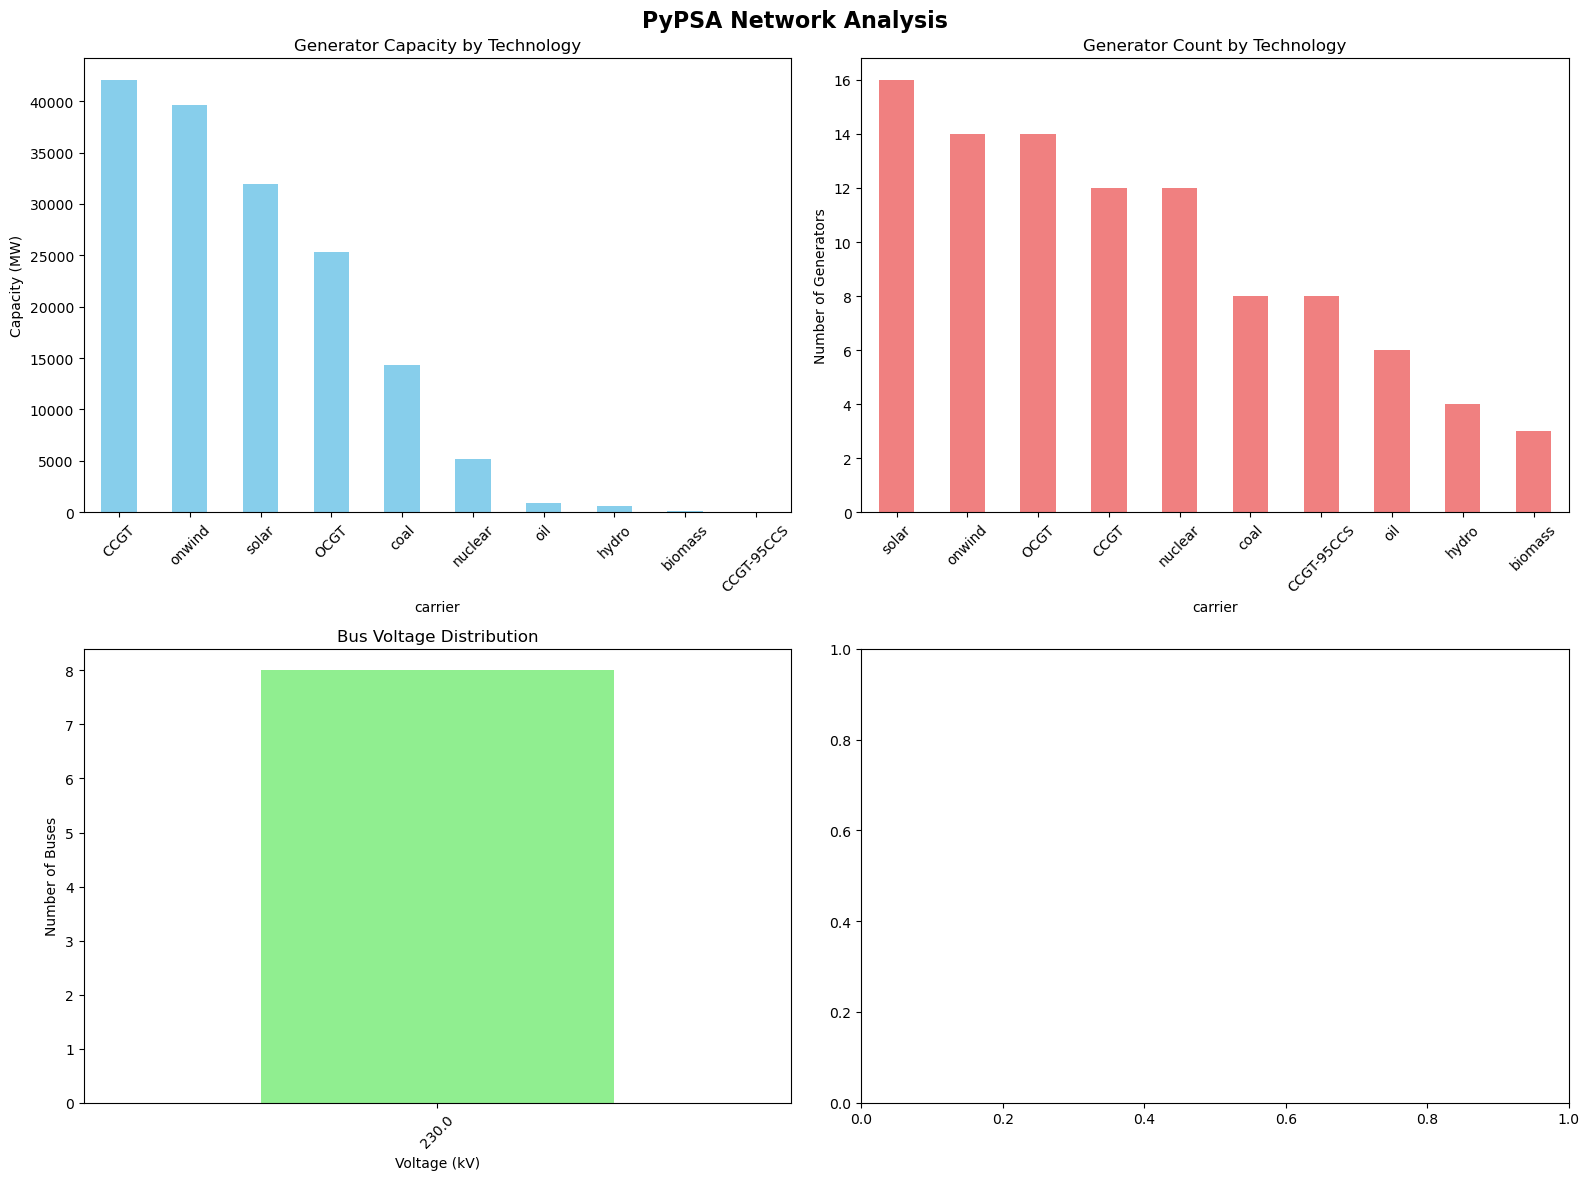

In [11]:
# 6. Visualizations
# =================

if netcdf_files:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('PyPSA Network Analysis', fontsize=16, fontweight='bold')
    
    # 1. Generator capacity by carrier
    if len(n.generators) > 0 and 'carrier' in n.generators.columns:
        ax1 = axes[0, 0]
        capacity_by_carrier = n.generators.groupby('carrier')['p_nom'].sum().sort_values(ascending=False)
        capacity_by_carrier.head(10).plot(kind='bar', ax=ax1, color='skyblue')
        ax1.set_title('Generator Capacity by Technology')
        ax1.set_ylabel('Capacity (MW)')
        ax1.tick_params(axis='x', rotation=45)
    
    # 2. Generator count by carrier
    if len(n.generators) > 0 and 'carrier' in n.generators.columns:
        ax2 = axes[0, 1]
        count_by_carrier = n.generators['carrier'].value_counts().head(10)
        count_by_carrier.plot(kind='bar', ax=ax2, color='lightcoral')
        ax2.set_title('Generator Count by Technology')
        ax2.set_ylabel('Number of Generators')
        ax2.tick_params(axis='x', rotation=45)
    
    # 3. Voltage distribution
    if len(n.buses) > 0 and 'v_nom' in n.buses.columns:
        ax3 = axes[1, 0]
        voltage_counts = n.buses['v_nom'].value_counts().sort_index()
        voltage_counts.plot(kind='bar', ax=ax3, color='lightgreen')
        ax3.set_title('Bus Voltage Distribution')
        ax3.set_xlabel('Voltage (kV)')
        ax3.set_ylabel('Number of Buses')
        ax3.tick_params(axis='x', rotation=45)
    
    # 4. State distribution (if available)
    if len(n.buses) > 0 and 'state' in n.buses.columns:
        ax4 = axes[1, 1]
        state_counts = n.buses['state'].value_counts().head(10)
        state_counts.plot(kind='bar', ax=ax4, color='gold')
        ax4.set_title('Top 10 States by Bus Count')
        ax4.set_ylabel('Number of Buses')
        ax4.tick_params(axis='x', rotation=45)
    else:
        # Alternative: Line capacity distribution
        if len(n.lines) > 0 and 's_nom' in n.lines.columns:
            ax4 = axes[1, 1]
            n.lines['s_nom'].hist(bins=20, ax=ax4, color='gold', alpha=0.7)
            ax4.set_title('Line Capacity Distribution')
            ax4.set_xlabel('Capacity (MVA)')
            ax4.set_ylabel('Number of Lines')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No data available for visualization.")


In [12]:
# 7. Test the PyPSA Parser
# ========================

# Import our custom parser
import sys
sys.path.append('../src')

try:
    from r2x_pypsa.parser import PypsaParser, PypsaGenerator, PypsaBus, PypsaLine, PypsaStorage
    
    if netcdf_files:
        print("Testing PyPSA Parser")
        print("=" * 50)
        
        # Create parser instance
        parser = PypsaParser(netcdf_file=str(selected_file))
        
        # Build R2X system
        print("Converting PyPSA network to R2X system...")
        system = parser.build_system()
        
        # Get components
        generators = system.get_components(PypsaGenerator)
        buses = system.get_components(PypsaBus)
        lines = system.get_components(PypsaLine)
        storage = system.get_components(PypsaStorage)
        
        print(f"\nR2X System Summary:")
        print(f"- Total components: {len(system.get_components())}")
        print(f"- Generators: {len(generators)}")
        print(f"- Buses: {len(buses)}")
        print(f"- Lines: {len(lines)}")
        print(f"- Storage Units: {len(storage)}")
        
        # Show sample converted components
        if generators:
            print(f"\nSample converted generators:")
            for i, gen in enumerate(list(generators)[:5]):
                print(f"  {i+1}. {gen.name} ({gen.carrier}) - {gen.p_nom} MW")
        
        if buses:
            print(f"\nSample converted buses:")
            for i, bus in enumerate(list(buses)[:5]):
                print(f"  {i+1}. {bus.name} ({bus.carrier}) - {bus.v_nom} kV")
        
        print(f"\n✅ Parser test successful!")
        
    else:
        print("No NetCDF files available for parser testing.")
        
except ImportError as e:
    print(f"Could not import parser: {e}")
    print("Make sure the r2x_pypsa package is properly installed.")
except Exception as e:
    print(f"Parser test failed: {e}")
    import traceback
    traceback.print_exc()


Could not import parser: No module named 'r2x'
Make sure the r2x_pypsa package is properly installed.


In [13]:
# 8. Data Quality and Validation
# ==============================

if netcdf_files:
    print("Data Quality Analysis")
    print("=" * 50)
    
    # Check for missing values
    print("Missing values analysis:")
    print("-" * 30)
    
    components = {
        'Generators': n.generators,
        'Buses': n.buses,
        'Lines': n.lines,
        'Storage Units': n.storage_units
    }
    
    for name, df in components.items():
        if len(df) > 0:
            missing = df.isnull().sum()
            total_missing = missing.sum()
            if total_missing > 0:
                print(f"\n{name} - Missing values:")
                for col, count in missing[missing > 0].items():
                    pct = (count / len(df)) * 100
                    print(f"  {col}: {count} ({pct:.1f}%)")
            else:
                print(f"\n{name}: No missing values ✅")
    
    # Check for zero or negative values where they shouldn't be
    print(f"\nData validation:")
    print("-" * 30)
    
    if len(n.generators) > 0:
        zero_capacity = (n.generators['p_nom'] == 0).sum()
        if zero_capacity > 0:
            print(f"⚠️  {zero_capacity} generators have zero capacity")
        
        negative_cost = (n.generators['marginal_cost'] < 0).sum()
        if negative_cost > 0:
            print(f"⚠️  {negative_cost} generators have negative marginal cost")
    
    if len(n.buses) > 0 and 'v_nom' in n.buses.columns:
        zero_voltage = (n.buses['v_nom'] == 0).sum()
        if zero_voltage > 0:
            print(f"⚠️  {zero_voltage} buses have zero voltage")
    
    if len(n.lines) > 0:
        zero_capacity = (n.lines['s_nom'] == 0).sum()
        if zero_capacity > 0:
            print(f"⚠️  {zero_capacity} lines have zero capacity")
    
    # Check for duplicate names
    print(f"\nDuplicate name check:")
    print("-" * 30)
    
    for name, df in components.items():
        if len(df) > 0:
            duplicates = df.index.duplicated().sum()
            if duplicates > 0:
                print(f"⚠️  {name}: {duplicates} duplicate names found")
            else:
                print(f"✅ {name}: No duplicate names")
    
    print(f"\nData quality analysis complete!")
    
else:
    print("No data available for quality analysis.")


Data Quality Analysis
Missing values analysis:
------------------------------

Generators - Missing values:
  ramp_limit_up: 43 (43.9%)
  ramp_limit_down: 43 (43.9%)
  vom_cost: 76 (77.6%)
  fuel_cost: 70 (71.4%)
  heat_rate: 76 (77.6%)

Buses: No missing values ✅

Storage Units - Missing values:
  state_of_charge_set: 24 (100.0%)

Data validation:
------------------------------
⚠️  52 generators have zero capacity
⚠️  8 generators have negative marginal cost

Duplicate name check:
------------------------------
✅ Generators: No duplicate names
✅ Buses: No duplicate names
✅ Storage Units: No duplicate names

Data quality analysis complete!
